<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia_eda_analysis/blob/main/EDA_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google import colab
colab.drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_7.xlsx', index_col = 0)

In [16]:
df.columns

Index(['Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2',
       'DM_Type2_Drug', 'OP', 'Number_of_HT', 'HT_drugs',
       'Total_Duration_of_HT', 'Chronic_Diseases',
       'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Used_Drugs', 'Education', 'Job',
       'Status', 'Work_Status', 'Exercise', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

**Lets have a look at the distributions of new columns and their relations with sarcopenia**

In [17]:
def histog_boxplot(column):
  fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 satır, 2 sütun

  sns.histplot(column, kde=True, ax=axes[0], color='skyblue')
  axes[0].set_title(f'{column.name} (Histogram)', fontsize=14)
  axes[0].set_xlabel('Değerler', fontsize=12)
  axes[0].set_ylabel('Frekans', fontsize=12)
  axes[0].grid(axis='y', linestyle='--', alpha=0.7)

  sns.boxplot(y=column, ax=axes[1], color='lightcoral')
  axes[1].set_title(f'{column.name} (Box Plot)', fontsize=14)
  axes[1].set_ylabel('Değerler', fontsize=12)
  axes[1].grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()

  # Remove plt.show() from the function so it can be called outside
  # plt.show()

  # Return the fig and axes objects
  return fig, axes

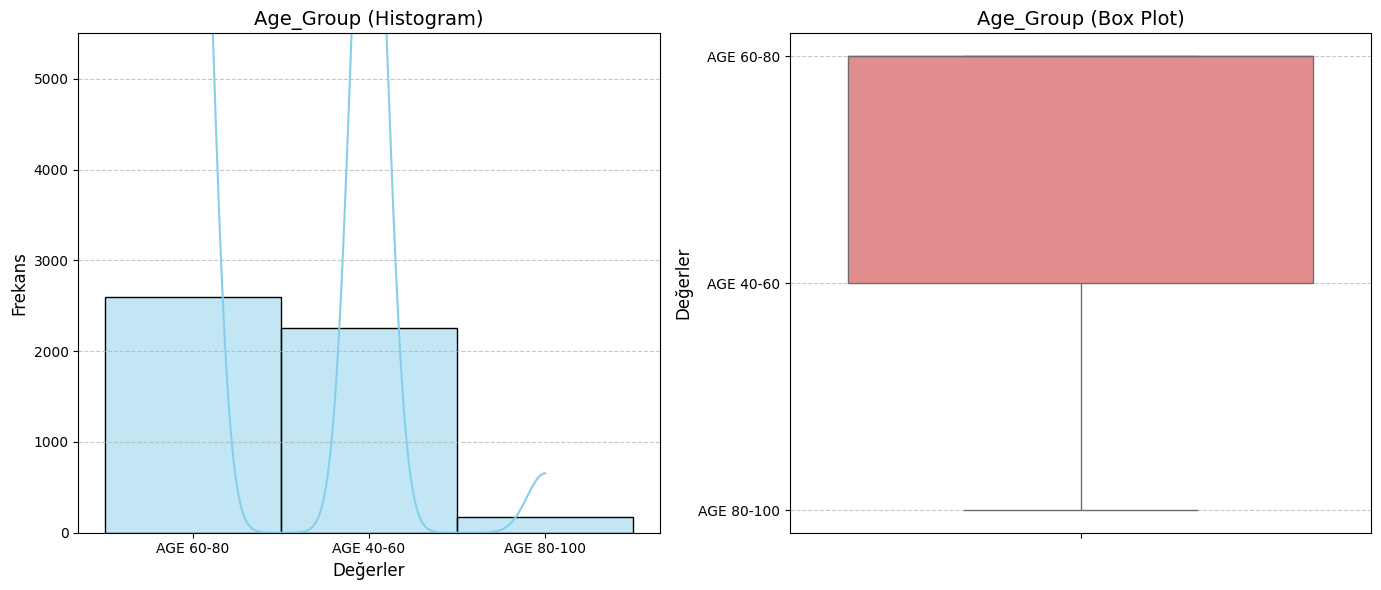

In [18]:
fig, axes = histog_boxplot(df.Age_Group)
axes[0].set_ylim(0, 5500)

plt.show()

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Number_of_HT (Histogram)'}, xlabel='Değerler', ylabel='Frekans'>,
        <Axes: title={'center': 'Number_of_HT (Box Plot)'}, ylabel='Değerler'>],
       dtype=object))

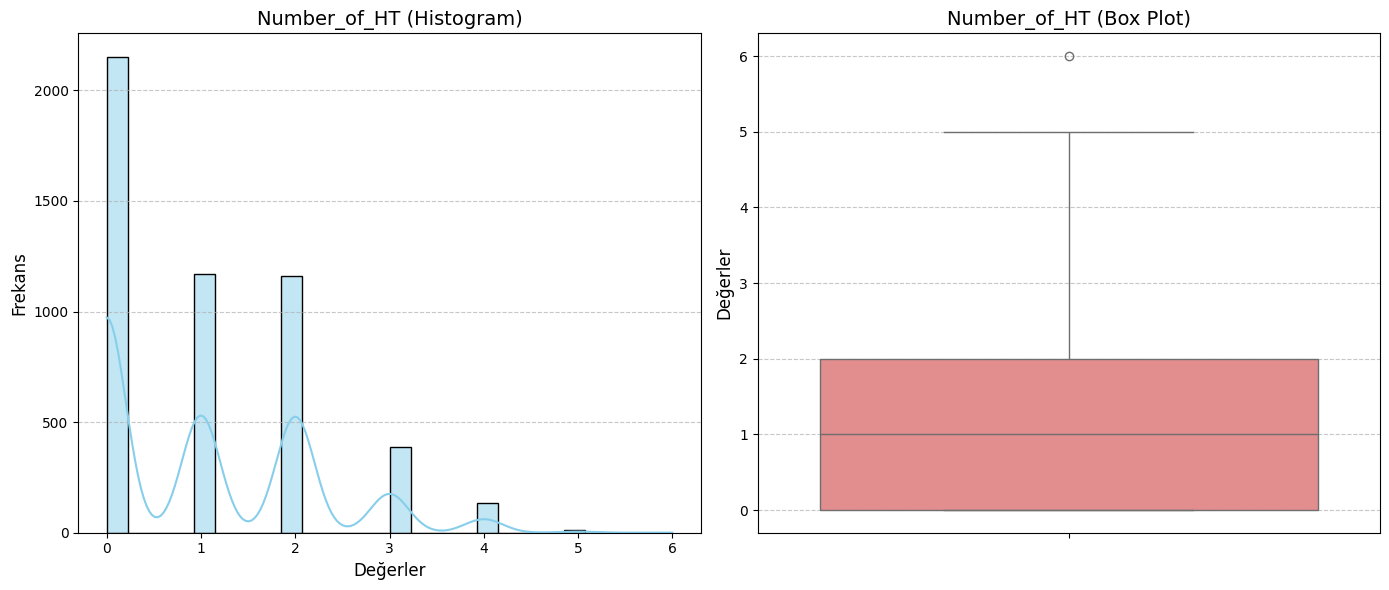

In [19]:
histog_boxplot(df.Number_of_HT)

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Total_Duration_of_HT (Histogram)'}, xlabel='Değerler', ylabel='Frekans'>,
        <Axes: title={'center': 'Total_Duration_of_HT (Box Plot)'}, ylabel='Değerler'>],
       dtype=object))

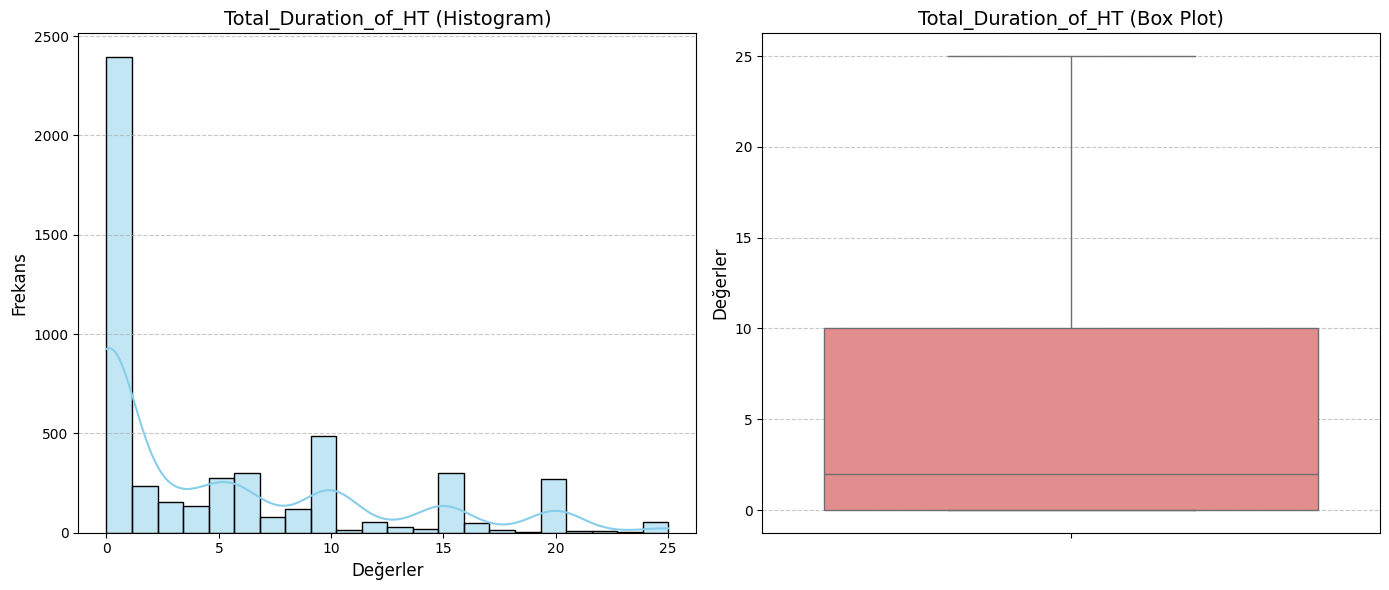

In [20]:
histog_boxplot(df.Total_Duration_of_HT)

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Total_Number_of_Chronic_Diseases (Histogram)'}, xlabel='Değerler', ylabel='Frekans'>,
        <Axes: title={'center': 'Total_Number_of_Chronic_Diseases (Box Plot)'}, ylabel='Değerler'>],
       dtype=object))

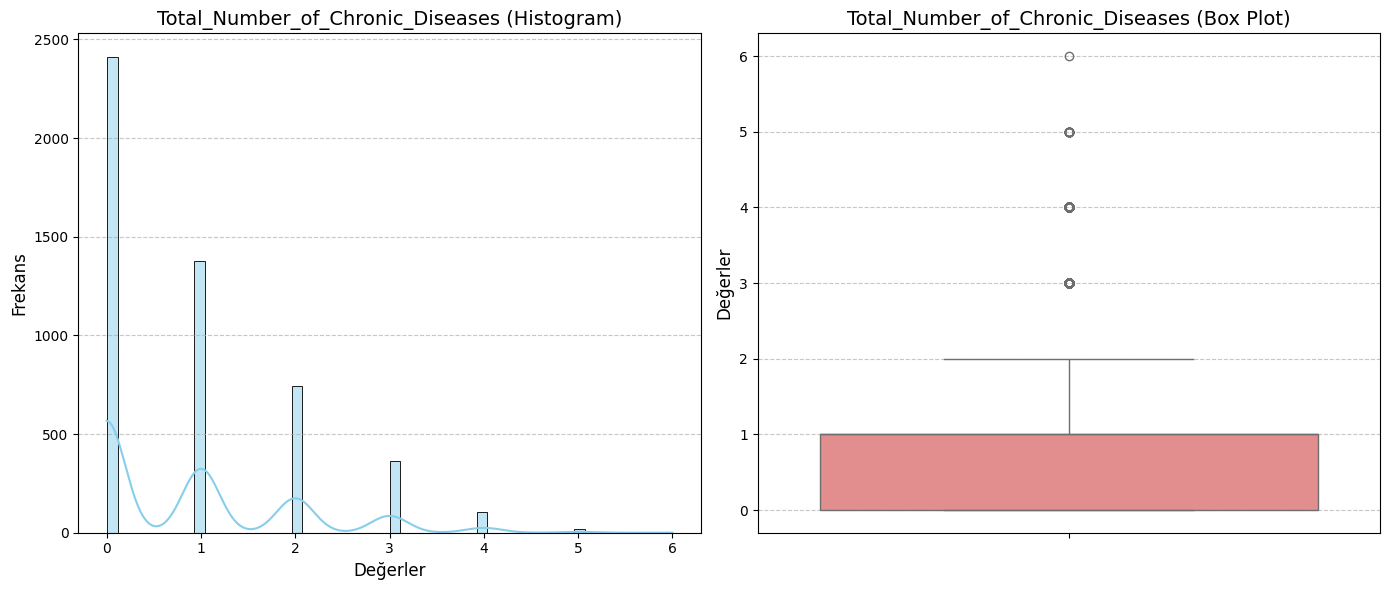

In [21]:
histog_boxplot(df.Total_Number_of_Chronic_Diseases)

In [22]:
df.Chronic_Diseases.value_counts()

,count
Chronic_Diseases,
DM_Type2,557
Hipotiroidi,404
"DM_Type2, Dyslipidemia",190
Dyslipidemia,159
KAH,142
...,...
"DM_Type2, KAH, COPD",1
"DM_Type2, Dyslipidemia, Hipotiroidi, COPD",1
"DM_Type2, Dyslipidemia, KAH, COPD",1


(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Total_Duration_of_Chronic_Diseases (Histogram)'}, xlabel='Değerler', ylabel='Frekans'>,
        <Axes: title={'center': 'Total_Duration_of_Chronic_Diseases (Box Plot)'}, ylabel='Değerler'>],
       dtype=object))

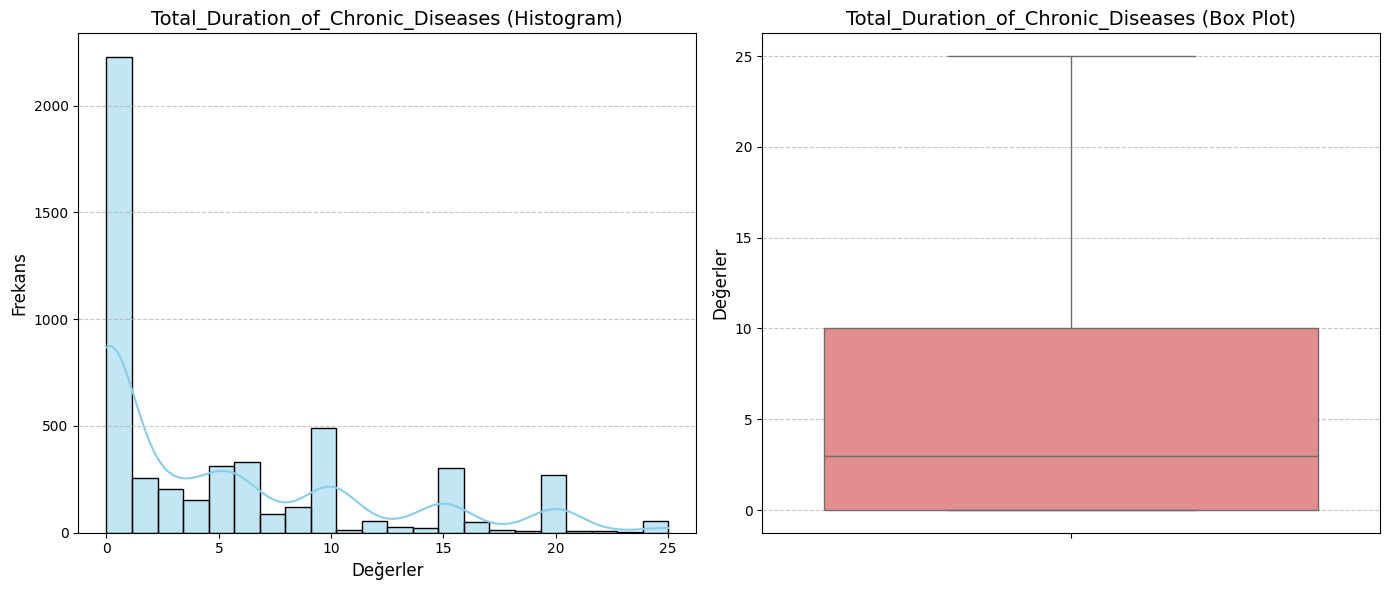

In [23]:
histog_boxplot(df.Total_Duration_of_Chronic_Diseases)

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Waist_Hip_Ratio (Histogram)'}, xlabel='Değerler', ylabel='Frekans'>,
        <Axes: title={'center': 'Waist_Hip_Ratio (Box Plot)'}, ylabel='Değerler'>],
       dtype=object))

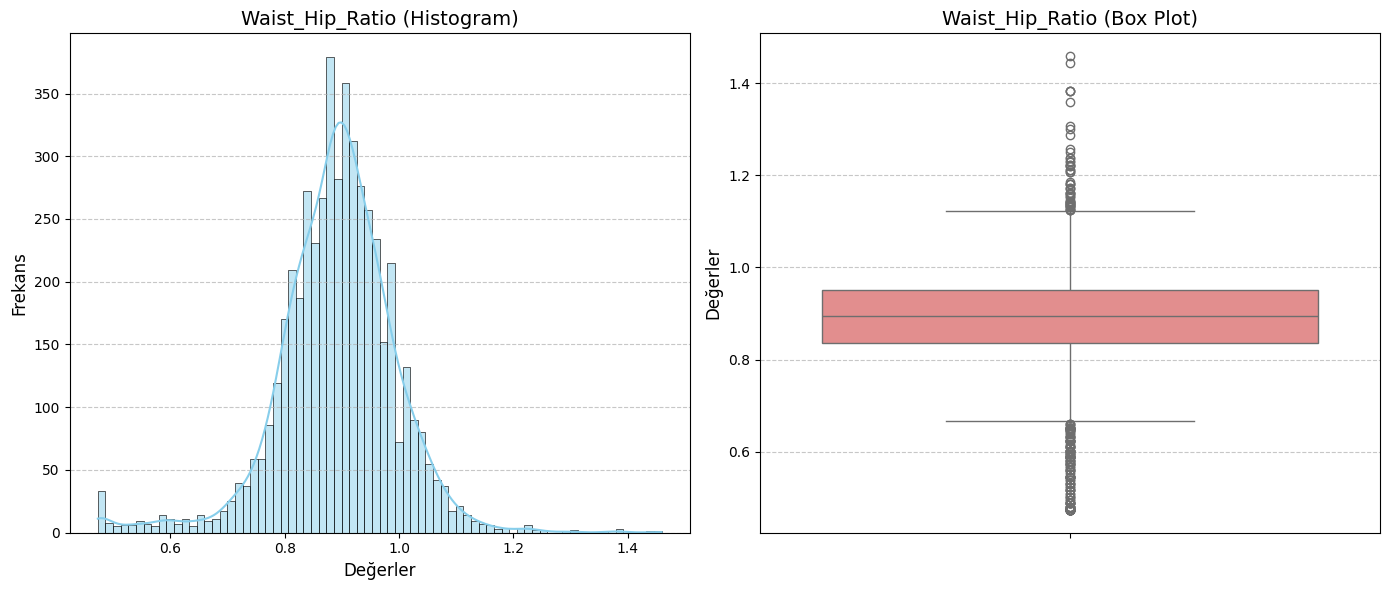

In [24]:
histog_boxplot(df.Waist_Hip_Ratio)

In [25]:
def cap_outliers_iqr(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        raise TypeError(f"Column '{column_name}' is not numeric. IQR method requires numeric data.")

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"--- Outlier Capping for '{column_name}' ---")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")

    df.loc[df[column_name] < lower_bound, column_name] = lower_bound
    df.loc[df[column_name] > upper_bound, column_name] = upper_bound

    return df

In [26]:
cap_outliers_iqr(df, 'Waist_Hip_Ratio')

--- Outlier Capping for 'Waist_Hip_Ratio' ---
Q1: 0.84
Q3: 0.95
IQR: 0.11
Lower Bound (Q1 - 1.5*IQR): 0.66
Upper Bound (Q3 + 1.5*IQR): 1.12


,Name,Gender,Age,Age_Group,Weight,DM_Type2,DM_Type2_Drug,OP,Number_of_HT,HT_drugs,...,Exercise,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,beyzanur 0,M,74.0,AGE 60-80,88.0,1,"Metformin, Gliclazide,sitagliptin",1.0,1,metoprolol,...,3-4/week,1,50.2,12.50,1.210,32.0,1.81,1.000000,27.80,0
1,beyzanur 1,M,62.0,AGE 60-80,105.0,0,0,0.0,0,0,...,0,0,49.0,12.10,1.420,47.0,1.38,1.122709,35.50,1
2,beyzanur 2,M,65.0,AGE 60-80,89.0,0,0,0.0,0,0,...,3-4/week,1,37.3,8.70,1.180,33.0,1.20,0.964912,31.20,0
3,beyzanur 3,F,71.0,AGE 60-80,68.0,0,0,1.0,3,Candesartane/Hidroklotiazid/Metoprolol,...,1-2/week,1,29.5,8.30,1.230,25.0,1.11,1.030000,26.60,0
4,beyzanur 4,F,61.0,AGE 60-80,80.0,0,0,0.0,2,candesartan/Hydrochlorothiazide,...,1-2/week,1,39.5,11.00,1.310,31.0,1.26,0.971429,31.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,ÖZDEN 77,F,70.0,AGE 60-80,73.0,1,janumed,0.0,2,hyzaar fort,...,0,0,28.2,14.67,0.810,19.5,0.79,0.927928,35.70,1
5012,ÖZDEN 78,F,72.0,AGE 60-80,78.0,0,0,0.0,2,"metoprolol, candesartan",...,3-4/week,1,37.9,9.14,1.230,18.7,1.24,0.925926,30.47,0
5013,ÖZDEN 79,M,79.0,AGE 60-80,95.0,0,0,1.0,3,"amlodipine, metoprolol, amlodipin",...,0,0,43.2,11.86,1.160,29.5,1.47,0.877193,29.32,0


(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Waist_Hip_Ratio (Histogram)'}, xlabel='Değerler', ylabel='Frekans'>,
        <Axes: title={'center': 'Waist_Hip_Ratio (Box Plot)'}, ylabel='Değerler'>],
       dtype=object))

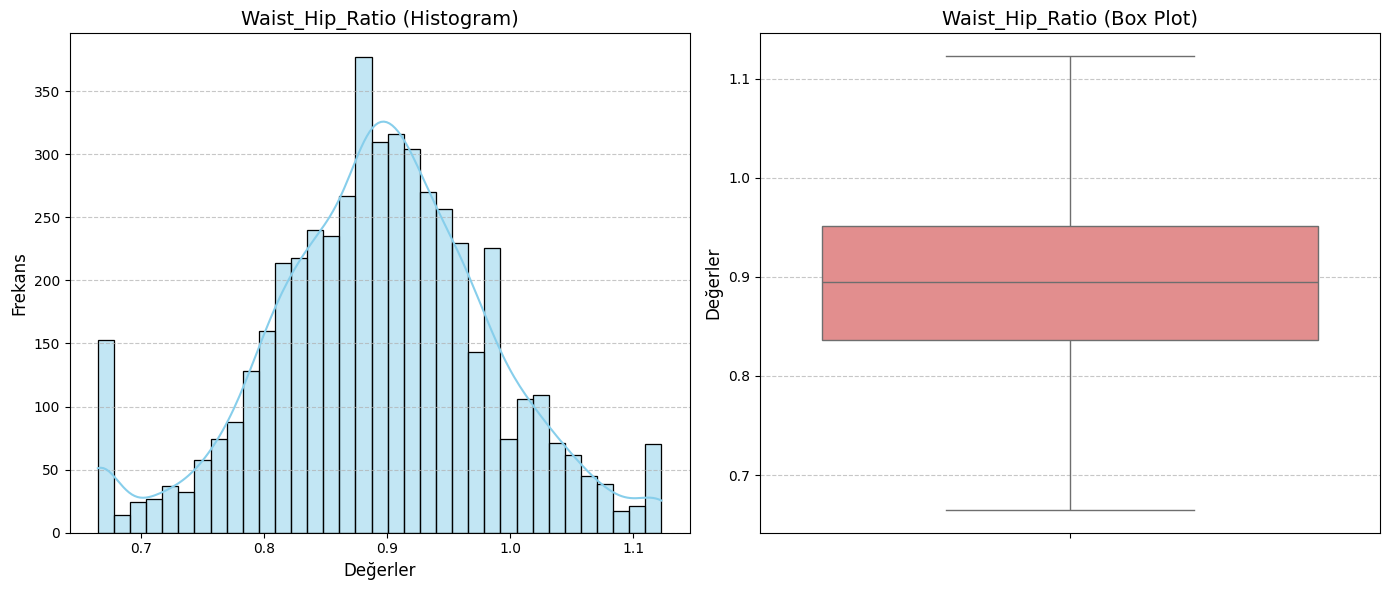

In [27]:
histog_boxplot(df.Waist_Hip_Ratio)

In [28]:
df.columns

Index(['Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2',
       'DM_Type2_Drug', 'OP', 'Number_of_HT', 'HT_drugs',
       'Total_Duration_of_HT', 'Chronic_Diseases',
       'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Used_Drugs', 'Education', 'Job',
       'Status', 'Work_Status', 'Exercise', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

# **Bi-variate Analysis of new features**

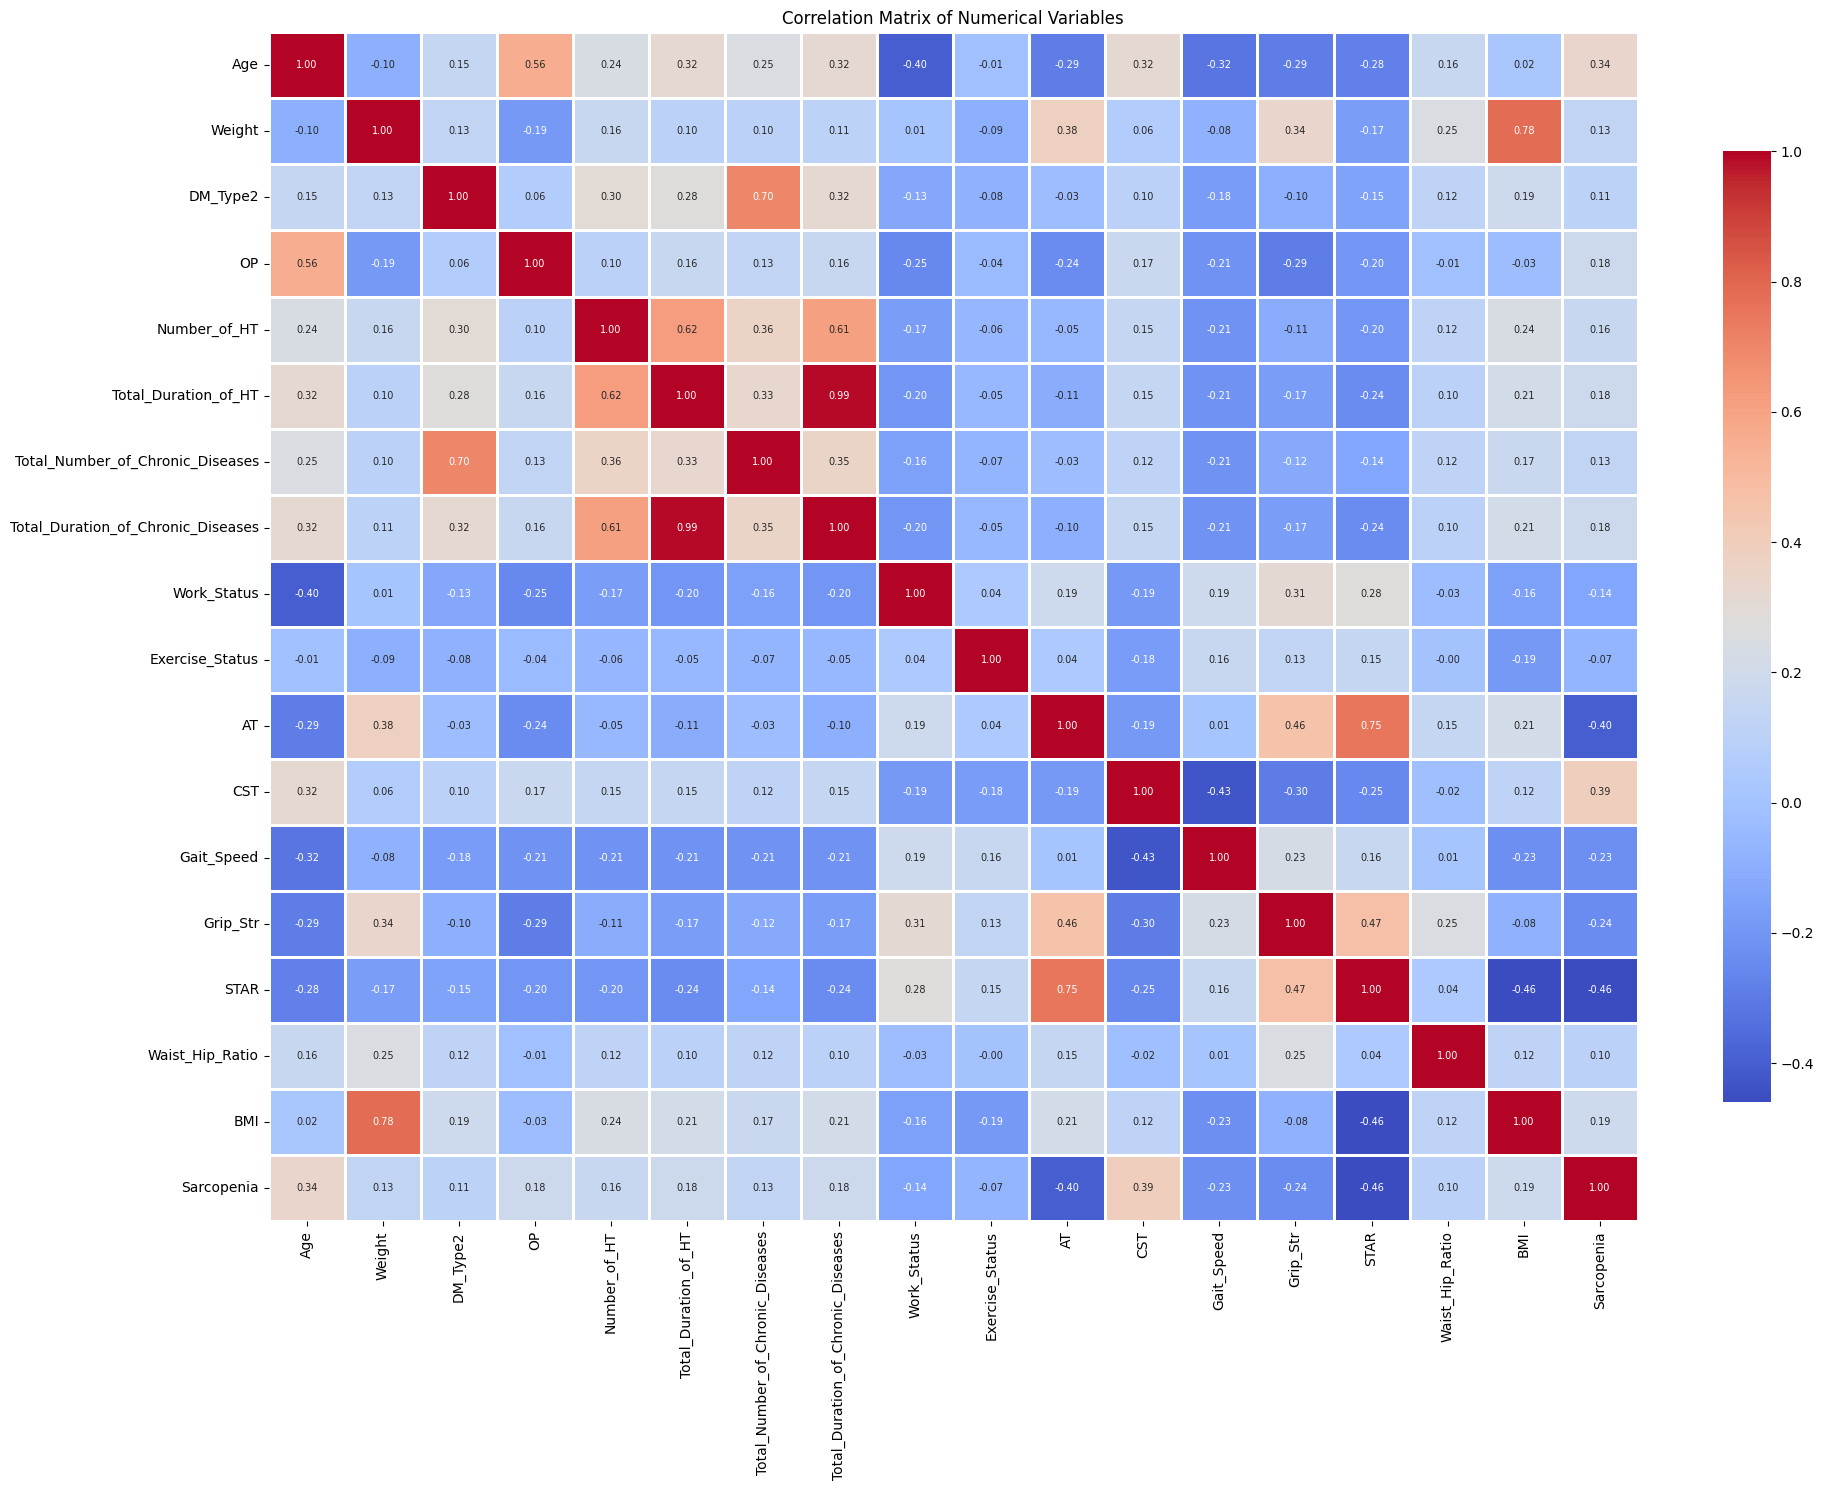

In [29]:
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr().round(2)

num_cols = len(df_numeric.columns)

fig_width = num_cols * 0.7
fig_height = num_cols * 0.7

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=1,cbar_kws={'shrink': 0.8},
    annot_kws={"fontsize": 7})
plt.title('Correlation Matrix of Numerical Variables')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

Numerical-Numerical

In [30]:
def bivariate_scatter (column1,column2):
  # Use the .name attribute to get the column names as strings
  sns.scatterplot(x=column1.name, y=column2.name, data=df, hue='Sarcopenia', palette=['skyblue', 'orange'])
  plt.title(f'{column1.name} vs {column2.name} Distribution', fontsize=16)
  plt.xlabel(f'{column1.name} Durumu', fontsize=12)
  plt.ylabel(f'{column2.name}', fontsize=12)

  # Izgara ekleyelim
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Grafiği göster
  plt.tight_layout()
  plt.show()

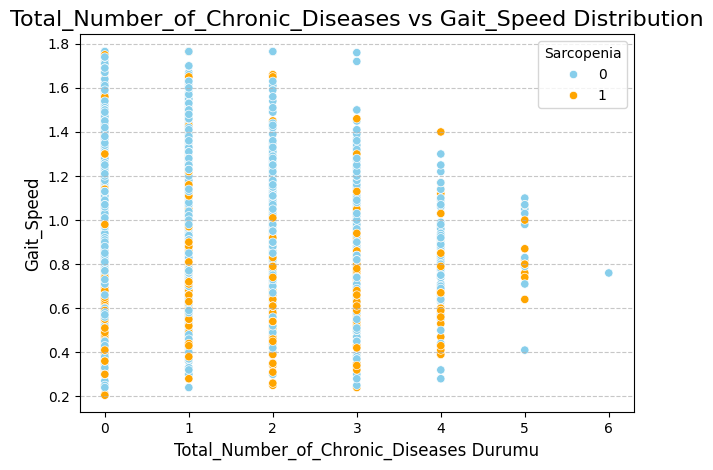

In [31]:
bivariate_scatter(df.Total_Number_of_Chronic_Diseases, df.Gait_Speed)

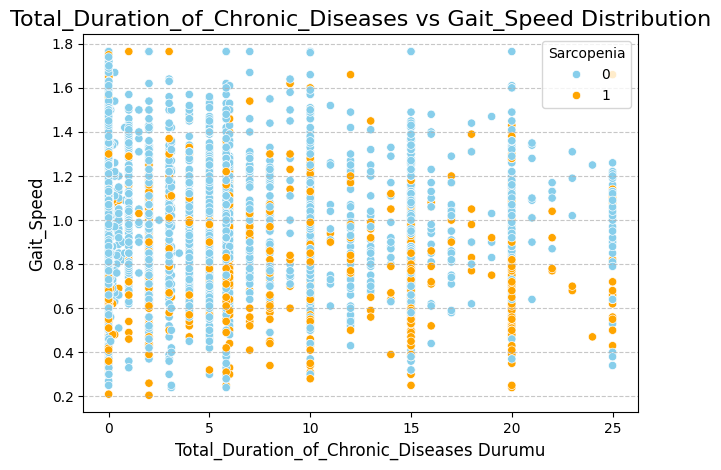

In [32]:
bivariate_scatter(df.Total_Duration_of_Chronic_Diseases, df.Gait_Speed)

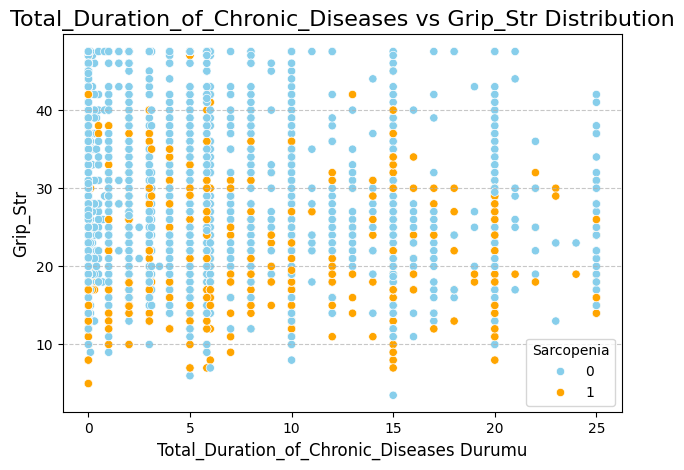

In [33]:
bivariate_scatter(df.Total_Duration_of_Chronic_Diseases, df.Grip_Str)

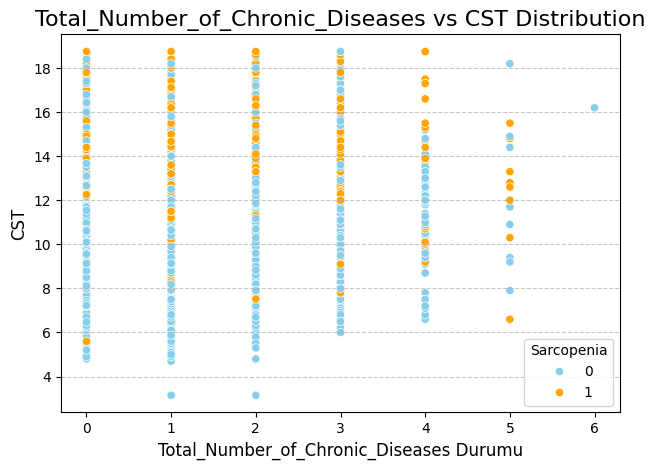

In [34]:
bivariate_scatter(df.Total_Number_of_Chronic_Diseases, df.CST)

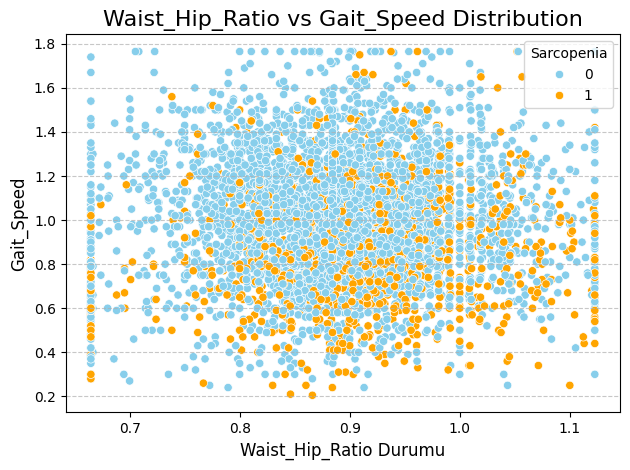

In [35]:
bivariate_scatter(df.Waist_Hip_Ratio, df.Gait_Speed)

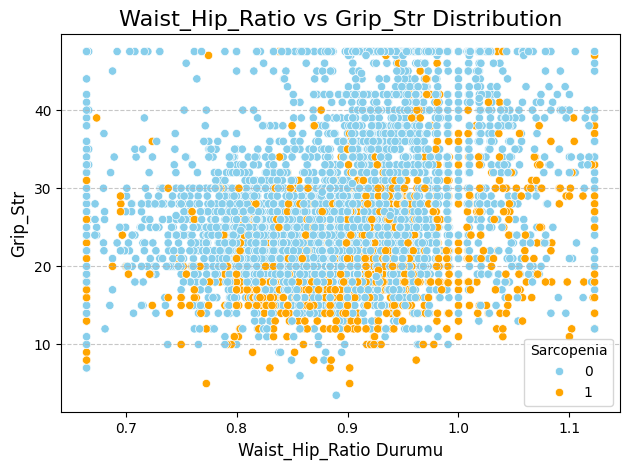

In [36]:
bivariate_scatter(df.Waist_Hip_Ratio, df.Grip_Str)

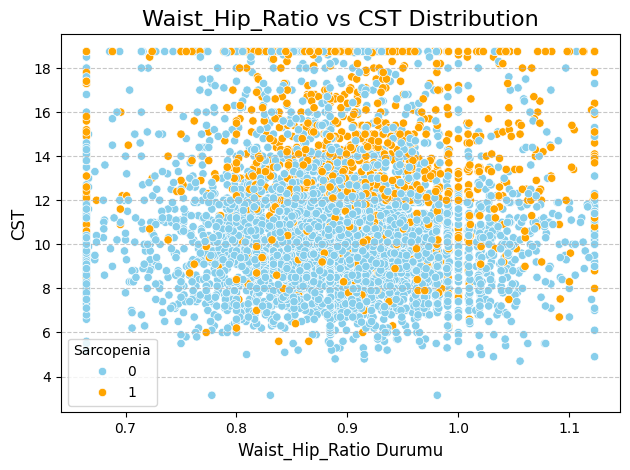

In [37]:
bivariate_scatter(df.Waist_Hip_Ratio, df.CST)

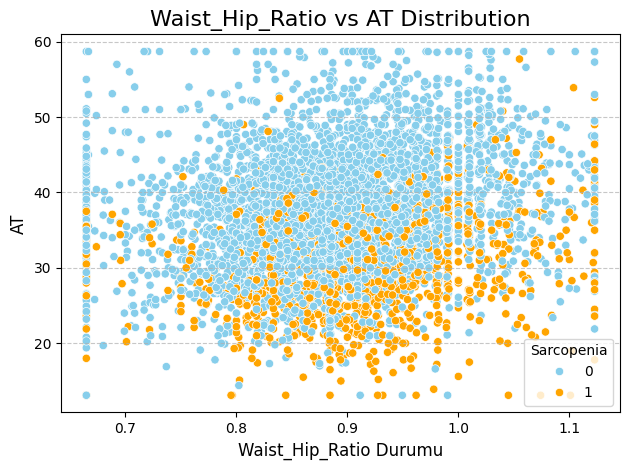

In [38]:
bivariate_scatter(df.Waist_Hip_Ratio, df.AT)

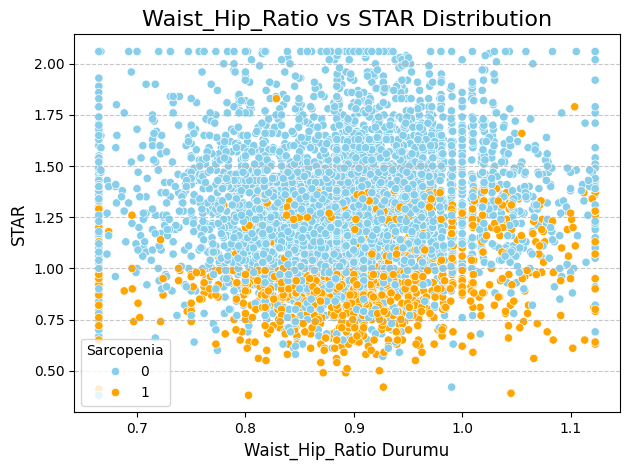

In [39]:
bivariate_scatter(df.Waist_Hip_Ratio, df.STAR)

Numerical-Sarcopenia

In [40]:
def bivariate (column1,column2):
  # Use the .name attribute to get the column names as strings
  sns.boxplot(x=column1.name, y=column2.name, data=df, hue='Sarcopenia', palette=['skyblue', 'orange'])
  plt.title(f'{column1.name} vs {column2.name} Distribution', fontsize=16)
  plt.xlabel(f'{column1.name} Durumu', fontsize=12)
  plt.ylabel(f'{column2.name}', fontsize=12)

  # Izgara ekleyelim
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Grafiği göster
  plt.tight_layout()
  plt.show()

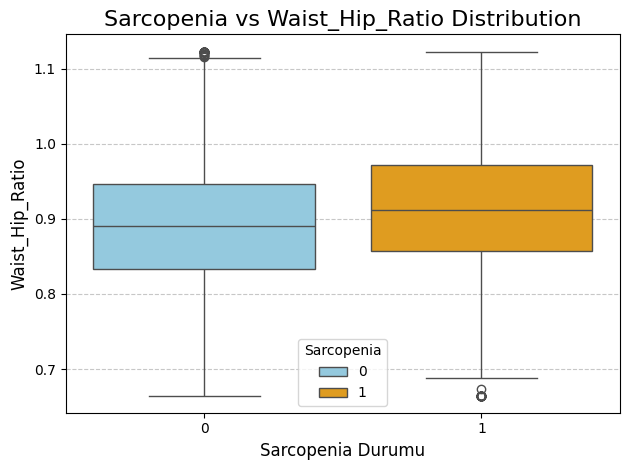

In [41]:
bivariate (df.Sarcopenia,df.Waist_Hip_Ratio)

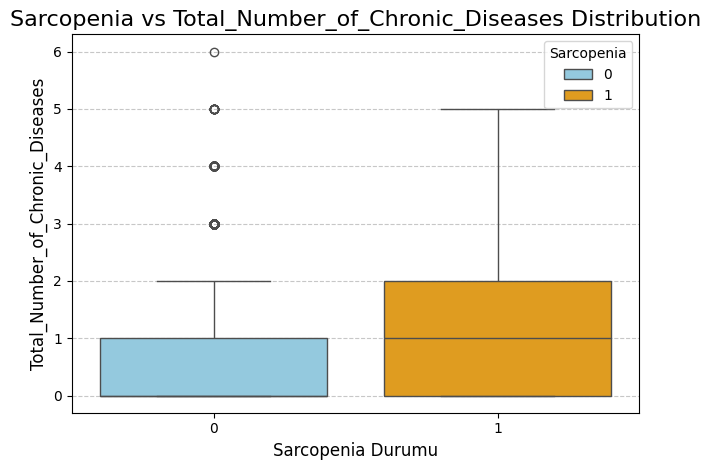

In [43]:
bivariate (df.Sarcopenia,df.Total_Number_of_Chronic_Diseases)

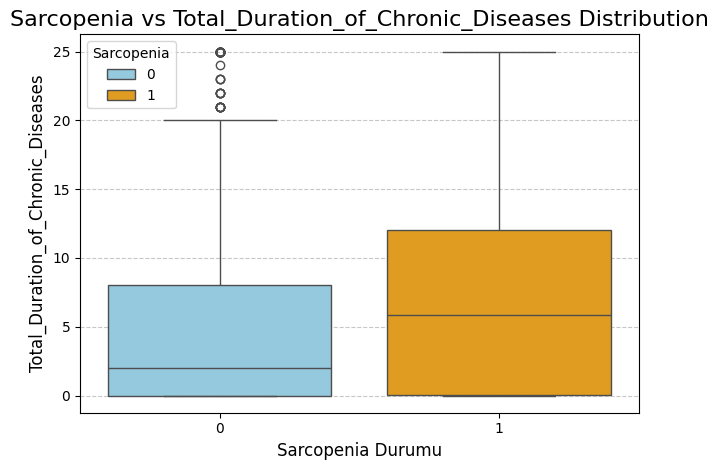

In [44]:
bivariate (df.Sarcopenia,df.Total_Duration_of_Chronic_Diseases)

<Axes: ylabel='Total_Duration_of_Chronic_Diseases'>

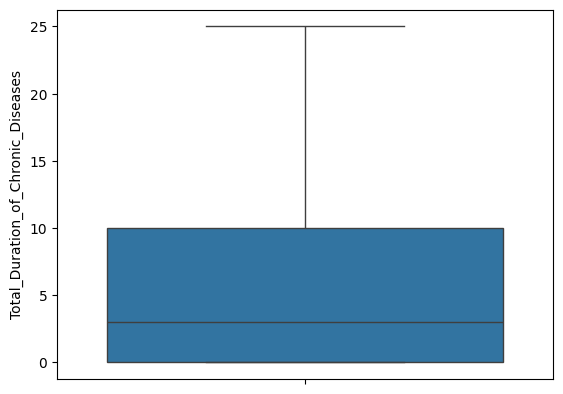

In [45]:
sns.boxplot(df.Total_Duration_of_Chronic_Diseases)

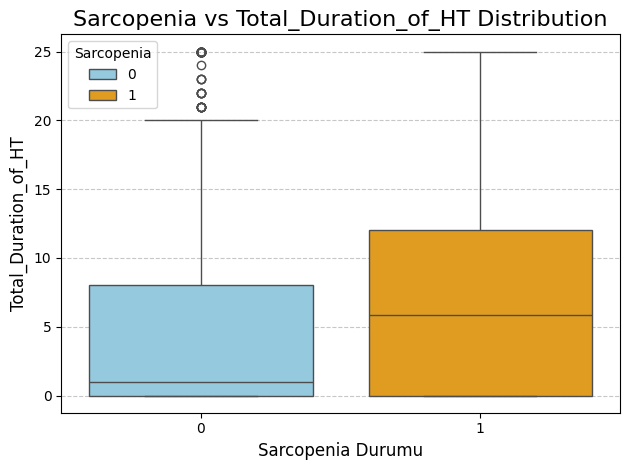

In [46]:
bivariate (df.Sarcopenia,df.Total_Duration_of_HT)

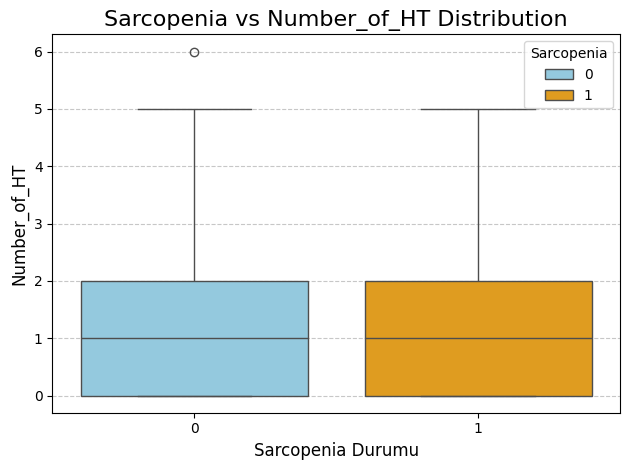

In [47]:
bivariate(df.Sarcopenia,df.Number_of_HT)

In [48]:
df["Total_Number_of_Chronic_Diseases"] = df["Total_Number_of_Chronic_Diseases"] + df["Number_of_HT"]

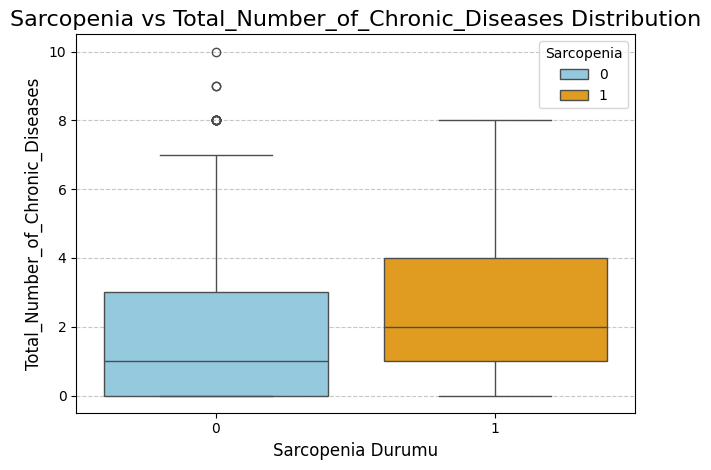

In [49]:
bivariate(df.Sarcopenia,df.Total_Number_of_Chronic_Diseases)

Categorical-Sarcopenia

In [50]:
def bivariate_crosstab (column1, column2):
  # Categorical vs. Sarcopenia
  # Calculate the cross-tabulation and normalize by index (rows)
  crosstab_result = pd.crosstab(column1, column2, normalize='index')
  # Plot the result as a stacked bar chart
  crosstab_result.plot(kind='bar', stacked=True)


  plt.title(f'{column1.name} vs {column2.name} Distribution (Normalized by Sarcopenia Status)', fontsize=16)
  plt.xlabel(f'{column1.name} Status', fontsize=12)
  # Removed the redundant ylabel as normalize='index' implies proportion within the index categories
  plt.ylabel('Proportion within Sarcopenia Status', fontsize=12)
  plt.xticks(rotation=0) # Keep x-axis labels horizontal

  plt.show()

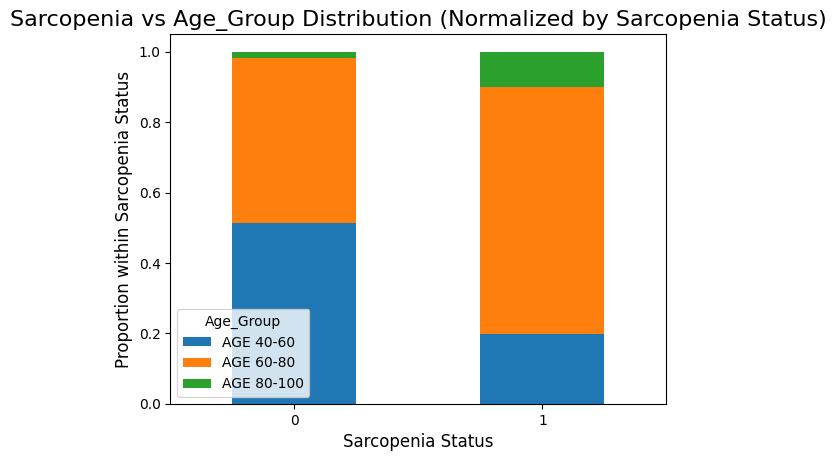

In [52]:
bivariate_crosstab(df.Sarcopenia, df.Age_Group)

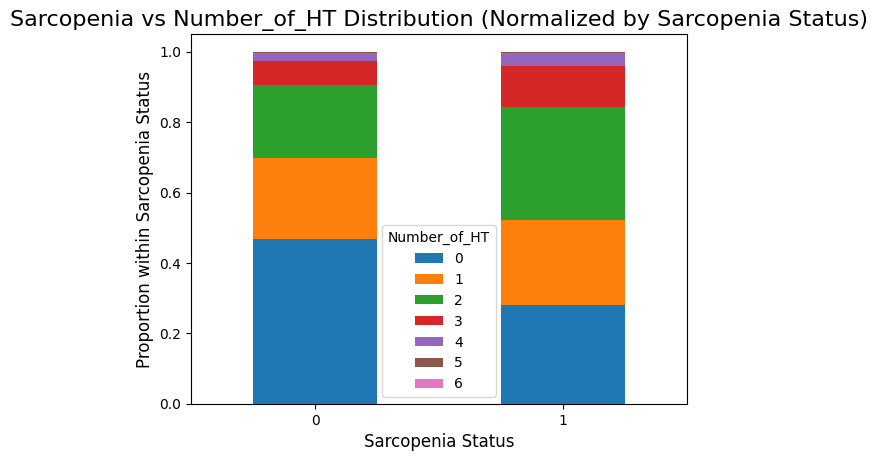

In [55]:
bivariate_crosstab(df.Sarcopenia, df.Number_of_HT)

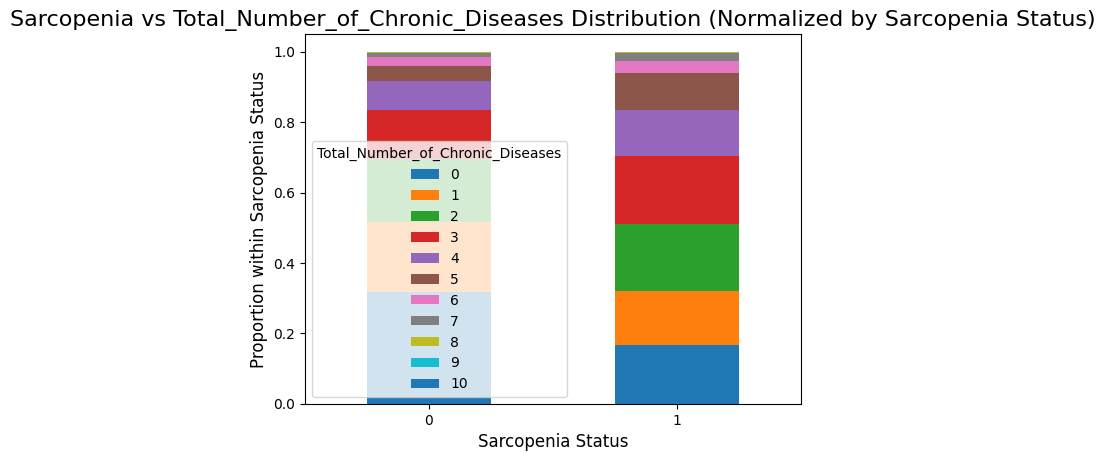

In [56]:
bivariate_crosstab(df.Sarcopenia, df.Total_Number_of_Chronic_Diseases)

**The rate of patients with chronic disease is higher among patients with sarcopenia. This means that having a chronic disease increases the likelihood of developing sarcopenia.Since Number_of_HT and Number_of_Chronic_Diseases has effects on the outcome in parallel and the second one includes the first one, Number_of_HT column will be deleted from the data frame.**

In [57]:
df.columns

Index(['Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2',
       'DM_Type2_Drug', 'OP', 'Number_of_HT', 'HT_drugs',
       'Total_Duration_of_HT', 'Chronic_Diseases',
       'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Used_Drugs', 'Education', 'Job',
       'Status', 'Work_Status', 'Exercise', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

In [ ]:
bivariate_crosstab(df.Sarcopenia, df.Status)

In [59]:
def count_drugs(drug_string):
    # Check if the input is a string before calling string methods
    if not isinstance(drug_string, str):
        # Handle non-string types (like int 0, NaN, etc.) as having no drugs
        return 0

    # Now we know drug_string is a string, so strip() is safe to use
    cleaned_string = drug_string.strip()

    if pd.isna(cleaned_string) or cleaned_string == "No drugs used" or cleaned_string == "0":
        return 0

    # Replace separators with a comma and split
    cleaned_string = cleaned_string.replace(" ve ", ",").replace(" and ", ",").replace(" + ", ",").replace("ve",",")

    # Find comma-separated words and filter out empty strings
    drugs = [drug.strip() for drug in cleaned_string.split(',') if drug.strip()]

    return len(drugs)

# count_drugs fonksiyonunu Used_Drugs sütununa uygulayarak Drug_Usage_Load sütununu oluştur
df['Number_of_Drug_Used'] = df['Used_Drugs'].apply(count_drugs)

In [60]:
df.Number_of_Drug_Used.value_counts()

,count
Number_of_Drug_Used,
0,1989
1,1499
2,882
3,378
4,184
5,66
6,13
7,4
8,1


In [61]:
df.Number_of_Drug_Used.isnull().sum()

np.int64(0)

In [64]:
df.drop("DM_Type2_Drug", axis=1, inplace=True)

In [65]:
df.drop("HT_drugs", axis=1, inplace=True)

In [70]:
df.columns

Index(['Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Number_of_HT', 'Total_Duration_of_HT', 'Chronic_Diseases',
       'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Used_Drugs',
       'Number_of_Drug_Used', 'Education', 'Job', 'Status', 'Work_Status',
       'Exercise', 'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str',
       'STAR', 'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

In [69]:
df.insert(13, 'Number_of_Drug_Used', df.pop('Number_of_Drug_Used'))

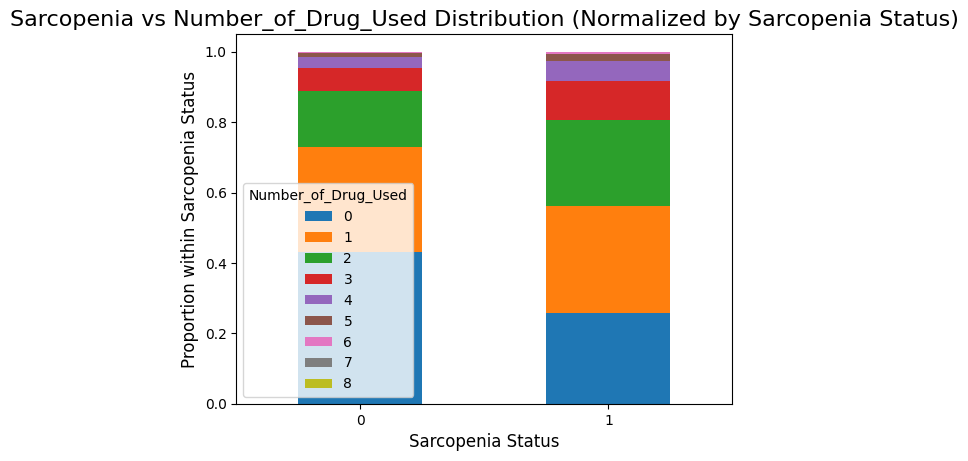

In [71]:
bivariate_crosstab(df.Sarcopenia, df.Number_of_Drug_Used)

**The proportion of patients with sarcopenia who are on medication is higher. This means that using medication for chronic illness increases the likelihood of developing sarcopenia.**

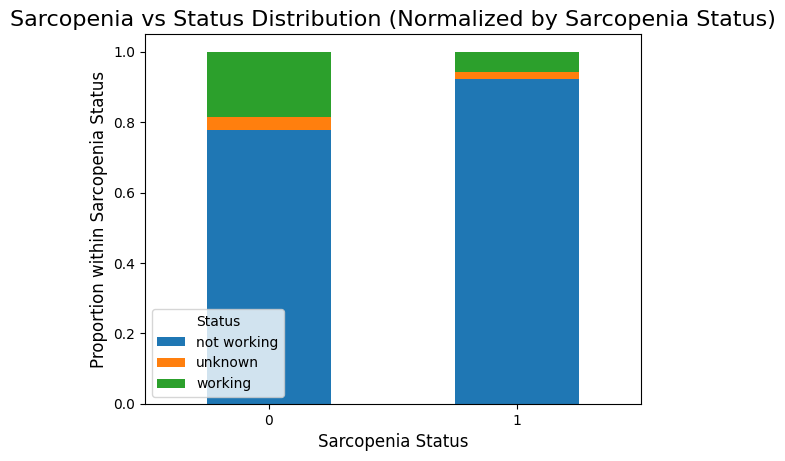

In [72]:
bivariate_crosstab(df.Sarcopenia, df.Status)

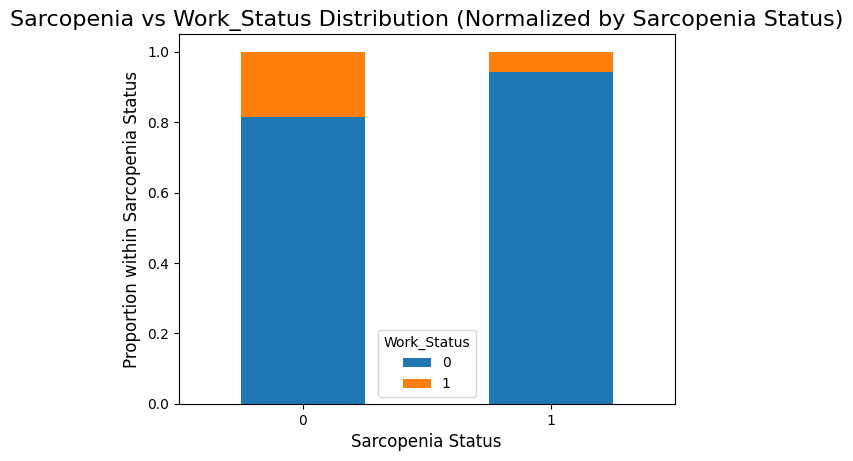

In [73]:
bivariate_crosstab(df.Sarcopenia, df.Work_Status)

**When the relationship between the two columns and sarcopenia is examined, it is seen that they are quite parallel. In this respect, it would be appropriate to delete the Work_Status column from the data frame and change the name of the Status column to Work_Status for better understanding.**

In [74]:
df.drop("Work_Status", axis=1, inplace=True)

In [75]:
df.rename(columns={'Status': 'Work_Status'}, inplace=True)

In [77]:
df.drop("Number_of_HT", axis=1, inplace=True)

In [79]:
df.insert(10, 'Total_Duration_of_HT', df.pop('Total_Duration_of_HT'))

In [80]:
df.columns

Index(['Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Chronic_Diseases', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Total_Duration_of_HT',
       'Used_Drugs', 'Number_of_Drug_Used', 'Education', 'Job', 'Work_Status',
       'Exercise', 'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str',
       'STAR', 'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

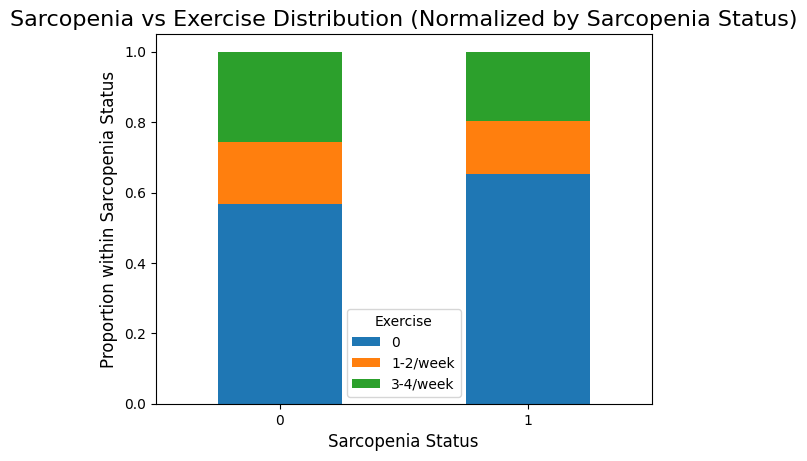

In [82]:
bivariate_crosstab(df.Sarcopenia, df.Exercise)

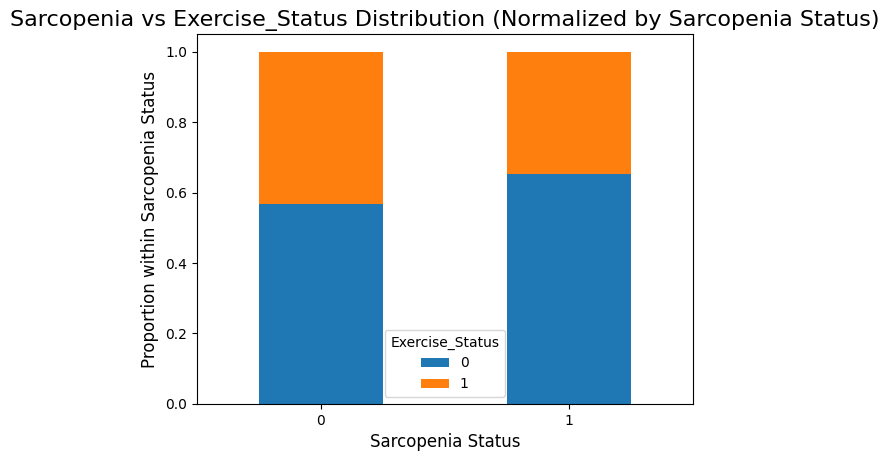

In [83]:
bivariate_crosstab(df.Sarcopenia, df.Exercise_Status)

When the relationship between the two columns and sarcopenia is examined, it is seen that they are quite parallel. In this respect, it would be appropriate to delete the Exercise_Status column from the data frame and change the name of the Exercise column to Exercise_Status for better understanding.

In [84]:
df.drop("Exercise_Status", axis=1, inplace=True)

In [85]:
df.rename(columns={'Exercise': 'Exercise_Status'}, inplace=True)

In [86]:
df.columns

Index(['Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Chronic_Diseases', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Total_Duration_of_HT',
       'Used_Drugs', 'Number_of_Drug_Used', 'Education', 'Job', 'Work_Status',
       'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str', 'STAR',
       'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

In [87]:
df.Used_Drugs.value_counts()

,count
Used_Drugs,
0,1989
metformin,108
amlodipin,72
ramipril,63
perindopril,39
...,...
"vildagliptin,metformin,empagliflozin,insülin aspart ARB+benipin, metoprolol, hct",1
metformin ramipril/furosemid/karvedilolol,1
"insülin,metformin",1


In [93]:
len(df["Used_Drugs"].unique())

1714

**Since we have 1714 different type of drugs used, it is not reasonable to group them for further analysis. Only the number of drugs per patient information is extracted from this column and inserted into Number_of_Drug_Used. Therefore, this column can be dropped.**

In [94]:
df.drop("Used_Drugs", axis=1, inplace=True)

In [96]:
df.columns

Index(['Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Chronic_Diseases', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Total_Duration_of_HT',
       'Number_of_Drug_Used', 'Education', 'Job', 'Work_Status',
       'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str', 'STAR',
       'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

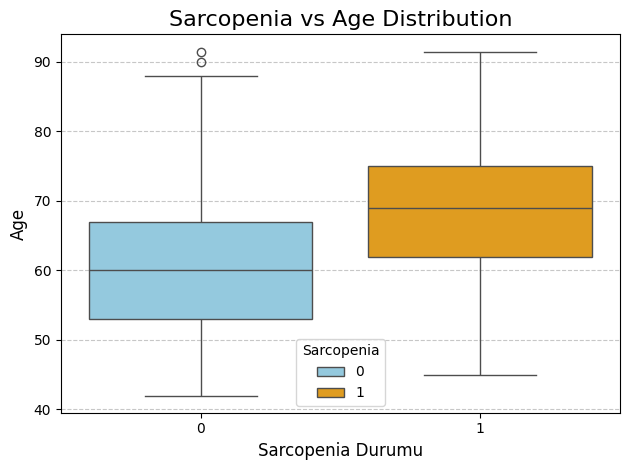

In [98]:
bivariate(df.Sarcopenia,df.Age)

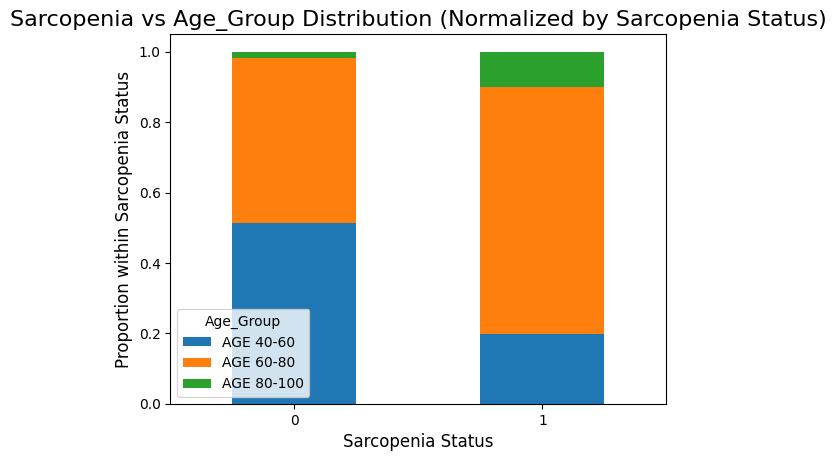

In [100]:
bivariate_crosstab(df.Sarcopenia, df.Age_Group)

**Since Age column reflects the average value and Age_Group reflects the probability of sarcopenia over the age groups, both columns will be kept.**

In [103]:
df.to_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_8.xlsx')